<a href="https://colab.research.google.com/github/min02choi/Style-Color-Detect/blob/main/gradation_calculate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 그라데이션 색상 및 방향 추출

폰트 내부의 그라데이션 정도 계산

구해야 할 것
1. 그라데이션 방향
2. 방향의 양 끝의 RGB값


전제 사항
1. 내부 텍스트에만 그라데이션이 적용 이 아님

### 코드 흐름
1. none
- 그라데이션 체크, 방향 구하기, 양 끝의 픽셀 구하기

2. str
-

### 그라데이션 이미지에서 색상 코드 값 확인하기
- 픽셀 값의 변화 파악

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

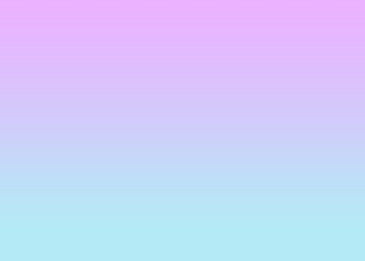

In [ ]:
image = cv2.imread('grad_image.jpeg')
cv2_imshow(image)

In [ ]:
image.shape

(261, 365, 3)

In [9]:
# 수직으로픽셀 값 확인
h = image.shape[0]
w = image.shape[1]

print(h, w)

color_arr = []

for i in range(h - 1):
    color_arr.append(image[i][w // 2])
    print(image[i][w // 2])

261 365
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[254 177 234]
[254 179 233]
[254 179 233]
[254 179 233]
[254 179 233]
[254 179 233]
[254 179 233]
[254 180 232]
[254 180 232]
[254 180 232]
[254 180 232]
[254 180 232]
[254 180 232]
[255 181 233]
[255 181 233]
[254 181 231]
[254 181 231]
[254 181 231]
[254 181 231]
[255 182 232]
[255 182 232]
[255 183 230]
[255 183 230]
[255 183 230]
[255 183 230]
[255 183 230]
[255 183 229]
[255 183 229]
[255 183 229]
[255 183 229]
[253 184 229]
[255 184 227]
[255 184 227]
[255 184 227]
[255 184 227]
[254 185 228]
[253 185 226]
[253 185 226]
[253 185 226]
[254 186 227]
[254 186 227]
[254 186 227]
[254 186 227]
[254 186 227]
[252 187 226]
[252 187 226]
[254 187 226]
[254 187 226]
[254 187 226]
[252 188 224]
[252 188 224]
[252 188 224]
[252 188 224]
[253 189 224]
[253 189 224]
[253 189 224]
[252 188 223]
[252 188 223]
[253 190 222]
[253 190 222]
[253 190 222]
[253 190 222]
[253 191 221]
[253 191 221

In [8]:
# 수평으로픽셀 값 확인
h = image.shape[0]
w = image.shape[1]

print(h, w)

for i in range(w - 1):
    print(image[h // 2][i])

261 365
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207

In [29]:
import math
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageEnhance

In [20]:
def bgr_difference(start, end):
    diff = [-(start[0] - end[0]), -(start[1] - end[1]), -(start[2] - end[2])]
    return diff

(365, 261)
261 365
[-9, 56, -55]
[-0.03448276  0.21455939 -0.21072797]
(261, 365, 4)
[254.96551724 178.21455939 234.78927203]
>>  [255, 178, 235]
[254.93103448 178.42911877 234.57854406]
>>  [255, 178, 235]
[254.89655172 178.64367816 234.36781609]
>>  [255, 179, 234]
[254.86206897 178.85823755 234.15708812]
>>  [255, 179, 234]
[254.82758621 179.07279693 233.94636015]
>>  [255, 179, 234]
[254.79310345 179.28735632 233.73563218]
>>  [255, 179, 234]
[254.75862069 179.50191571 233.52490421]
>>  [255, 180, 234]
[254.72413793 179.7164751  233.31417625]
>>  [255, 180, 233]
[254.68965517 179.93103448 233.10344828]
>>  [255, 180, 233]
[254.65517241 180.14559387 232.89272031]
>>  [255, 180, 233]
[254.62068966 180.36015326 232.68199234]
>>  [255, 180, 233]
[254.5862069  180.57471264 232.47126437]
>>  [255, 181, 232]
[254.55172414 180.78927203 232.2605364 ]
>>  [255, 181, 232]
[254.51724138 181.00383142 232.04980843]
>>  [255, 181, 232]
[254.48275862 181.2183908  231.83908046]
>>  [254, 181, 232]


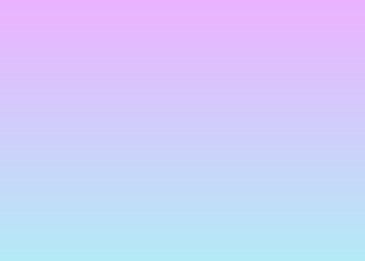

In [58]:
# 양 끝의 픽셀 값을 기준으로 다시 재현해보기
#
img = Image.new(mode='RGB', size=(365, 261), color=(0, 0, 0))
draw = ImageDraw.Draw(img)

start = [255, 178, 235]
end = [246, 234, 180]

print(img.size)

w = img.size[0]    # 365
h = img.size[1]    # 261

print(h, w)

# 방향 길이에 따라 offset계산
# 방향 길이 구하는 법: 처음 픽셀과 끝 픽셀을 구하면 ... 추후
# 결과가 이상하면 구간으로 잘라서 재현하는 방법도 있음
LENGTH = 261
bgr_diff = bgr_difference(start, end)
print(bgr_diff)
bgr_offset = np.array([m / LENGTH for m in bgr_diff])
print(bgr_offset)

blue = start[0]
green = start[1]
red = start[2]

float_bgr = np.array([float(blue), float(green), float(red)])
# float_bgr = np.array([float(blue), float(green), float(red)])


# Pillow 이미지를 OpenCV 이미지로 변환
open_cv_image = np.array(img)
# OpenCV 이미지를 BGRA 형식으로 변환
open_cv_image = cv2.cvtColor(open_cv_image, cv2.COLOR_RGBA2BGRA)
print(open_cv_image.shape)

# 정수형으로 된다고 가정하면 반올림(round)
for i in range(open_cv_image.shape[0]):
    float_bgr += bgr_offset
    print(float_bgr)
    int_bgr = [round(float_bgr[0]), round(float_bgr[1]), round(float_bgr[2])]
    print(">> ", int_bgr)

    for j in range(open_cv_image.shape[1]):
        # print(int_bgr)
        # print(open_cv_image[i][j])
        open_cv_image[i][j][0] = int_bgr[0]
        open_cv_image[i][j][1] = int_bgr[1]
        open_cv_image[i][j][2] = int_bgr[2]

cv2_imshow(open_cv_image)


시작 색, 끝 색이 주어지면 이들의 평균으로 그림을 그렸을 때 원본이 나온다는 가정이 맞다고 판단됨


이제 완벽하게 재현하기 위해 필요한 매개변수
1. 시작 색
2. 끝 색
3. 방향

### 시작색, 끝색, 방향이 지정되었을 때 그라데이션 그리기
- 방향정보는 단위 벡터로 표시

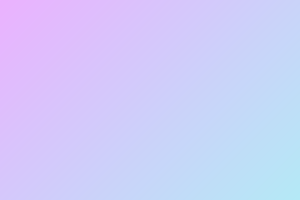

In [63]:
import numpy as np
from PIL import Image, ImageDraw

# 시작 색과 끝 색
start_color = (255, 0, 0)  # 빨간색
end_color = (0, 0, 255)    # 파란색

start_color = (255, 178, 235)
end_color = (246, 234, 180)

start_color = (235, 178, 255)
end_color = (180, 234, 246)

# 이미지 크기
width = 300
height = 200

# 방향 (단위 벡터로 표현)
direction = np.array([1, 1])  # x축 방향으로 1, y축 방향으로 1

# 이미지 생성
img = Image.new('RGB', (width, height), color=(0, 0, 0))
draw = ImageDraw.Draw(img)

# 시작 색과 끝 색 사이의 보간값 계산하여 이미지에 그라데이션 적용
for x in range(width):
    for y in range(height):
        # 현재 위치에서 시작 색과 끝 색 사이의 보간값 계산
        ratio = (x * direction[0] + y * direction[1]) / (width + height)
        blended_color = tuple(int(start_channel + (end_channel - start_channel) * ratio)
                              for start_channel, end_channel in zip(start_color, end_color))
        # 보간된 색을 이미지에 적용
        draw.point((x, y), fill=blended_color)

# Pillow 이미지를 OpenCV 이미지로 변환
cv_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# 이미지 화면에 표시
cv2_imshow(cv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


* 그라데이션의 방향을 알 수 있는 방법... 벡터형으로
이거만 하면 다 해결됨